In [1]:
doanalysis=1

In [2]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs
import os.path
import xesmf as xe

In [3]:
#set global variables to pass into BASH commands. 

ctsmrepo='ctsmsept20'
defbuildroot='/glade/scratch/'

#Settings for the SP ensemble
clm5sp=0
sp=0
noc4=1
if(sp == 1):
    resub=0
    ncases=14
    ychoose =2009
    defcase='SPdefault'
    defbuildroot='/glade/scratch/'
    if(noc4 == 1):
        ens_directory='SPfates_ens_noc4'
        caseroot='spfates_noc4_n'
        paramsdir='param_files_sp_noc4'
        paramfiledefault='fates_params_default_noc4.nc'
        ychoose =2003
    else:
        ens_directory='SPfates_ens'
        caseroot='spfates_01_n'
        paramsdir='param_files_sp'
        paramfiledefault='fates_params_default.nc'
else:
    if(clm5sp == 1):
        caseroot='clm5_sp'
        ychoose =2003
    else:
#Settings for the NOCOMP ensemble. 
#set global variables to pass into BASH commands. 
        sp=0
        defcase='SPdefault'
        ens_directory='NOCOMP_fates_ens'
        caseroot='nocomp_fates_01_n'
        paramsdir='param_files_sp'
        paramfiledefault='fates_params_default.nc'    
        resub=2
        ncases=14
        ychoose =2019
        
        

In [4]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs
import os.path

In [5]:

titles=['clumping_index -','clumping_index +','leaf_diameter -','leaf_diameter +',
           'stomatal_slope -','stomatal_slope +','vcmax25top -','vcmax25top +',
           'leaf_xl -','leaf_xl +','rholvis -','rholvis +',    
           'smpsc -','smpsc +' ]
output='/glade/scratch/rfisher/'
conv = 3600*24*365
yr='.clm2.h0.'

In [6]:
if(clm5sp == 1):
    run=caseroot    
else:
    run=caseroot+str(0)
arc = output + 'archive/' + run + '/lnd/hist/'
# arc = output + run + '/run/'   
f2=(arc +run+yr+str(ychoose)+'-01.nc') 
print(f2)
if(os.path.isfile(f2)):
    dsdef = xr.open_mfdataset(arc +run+yr+str(ychoose)+'*', decode_times=False)
else:
    arc = output + run + '/run/'
    dsdef = xr.open_mfdataset(arc +run+yr+str(ychoose)+'*', decode_times=False)


/glade/scratch/rfisher/archive/nocomp_fates_01_n0/lnd/hist/nocomp_fates_01_n0.clm2.h0.2019-01.nc
<xarray.Dataset>
Dimensions:                          (fates_levage: 7, fates_levagepft: 84, fates_levcacls: 2, fates_levcan: 2, fates_levcapf: 24, fates_levcnlf: 60, fates_levcnlfpf: 720, fates_levcwdsc: 4, fates_levelcwd: 4, fates_levelem: 1, fates_levfuel: 6, fates_levheight: 6, fates_levpft: 12, fates_levscag: 91, fates_levscagpf: 1092, fates_levscls: 13, fates_levscpf: 156, glc_nec: 10, hist_interval: 2, lat: 46, levdcmp: 25, levgrnd: 25, levlak: 10, levsoi: 20, lon: 72, ltype: 9, time: 12)
Coordinates:
  * levgrnd                          (levgrnd) float32 0.01 0.04 ... 41.998436
  * levlak                           (levlak) float32 0.05 0.6 ... 34.325 44.775
  * levdcmp                          (levdcmp) float32 0.01 0.04 ... 41.998436
  * fates_levscls                    (fates_levscls) float32 0.0 5.0 ... 100.0
  * fates_levcacls                   (fates_levcacls) float32 0.0 5.0
 

In [7]:
if doanalysis ==1:
    
    fig = plt.figure()
    plt.rcParams['figure.figsize'] = [13, 6]
    #fig.subplots_adjust(hspace=0.1, wspace=0.1)

    filenameb ='/glade/u/home/rfisher/GBAF_Benchmark.nc'
    filename ='/glade/u/home/rfisher/GBAF_FT_v0900.nc'
    gppbm = xr.open_dataset(filenameb,group='MeanState')
    gppobs2 = xr.open_dataset(filename,group='MeanState')
    
    #gppobs.phase_map_of_gpp.sel(lat_=slice(-20, 0),lon_=slice(-100, 0)).plot(vmin=-3, vmax=3)
    #plt.title(models[i])   
  #  print(gppobs2)
   # ax=np.multiply(np.mean(gppobs.timeint_of_gpp,0),conv/365).plot(cmap='Greens')
   # ax.set_clim(-0, 12)
 
   # fnmfig='figs/default_GPP_'+caseroot+'.png'
   # print(fnmfig)
   # plt.savefig(fnmfig)
 
#gppobs2.timeint_of_gpp.plot(vmin=0, vmax=12)
#print(gppbm)
   # gppbm.timeint_of_gpp.plot(vmin=0, vmax=12,cmap='Greens')
    


<Figure size 432x288 with 0 Axes>

<h3> Get ILAMB data</h3>

In [8]:
if doanalysis ==1: 
    filenameb ='/glade/u/home/rfisher/GBAF_Benchmark.nc'
    gppbm = xr.open_dataset(filenameb,group='MeanState')

    filenameb ='/glade/u/home/rfisher/MODIS_Benchmark.nc'
    etbm = xr.open_dataset(filenameb,group='MeanState')

    filenameef ='/glade/u/home/rfisher/GBAF_Benchmark_EF.nc'
    efbm = xr.open_dataset(filenameef,group='MeanState')


<h3> Regrid ILAMB data</h3>

In [9]:
ds=gppbm.timeint_of_gpp
ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 90, 4.0)),
                     'lon': (['lon'], np.arange(-180, 180, 5.0)),
                    }
                   )
regridder = xe.Regridder(ds, ds_out, 'bilinear')
regridder.clean_weight_file()
regridder
ds_out_GPP_obs = regridder(ds)
ds_out_GPP_obs = ds_out_GPP_obs.where(ds_out_GPP_obs<10000,0,0)

ds=etbm.timeint_of_et
regridder = xe.Regridder(ds, ds_out, 'bilinear')
regridder.clean_weight_file()
regridder
ds_out_ET_obs = regridder(ds)
ds_out_ET_obs = ds_out_ET_obs.where(ds_out_ET_obs<10000,0,0)
#ds_out_ET_obs.plot()

ds=efbm.timeint_of_EvapFrac
regridder = xe.Regridder(ds, ds_out, 'bilinear')
regridder.clean_weight_file()
regridder
ds_out_EF_obs = regridder(ds)
ds_out_EF_obs = ds_out_EF_obs.where(ds_out_EF_obs<10000,0,0)
ds_out_EF_obs = ds_out_EF_obs.where(ds_out_EF_obs>0.0001,np.nan,0)



Create weight file: bilinear_360x720_45x72.nc
Remove file bilinear_360x720_45x72.nc
Create weight file: bilinear_360x720_45x72.nc
Remove file bilinear_360x720_45x72.nc
Create weight file: bilinear_360x720_45x72.nc
Remove file bilinear_360x720_45x72.nc


<h3>Regrid Model GPP</h3>

Create weight file: bilinear_46x72_45x72.nc
Remove file bilinear_46x72_45x72.nc


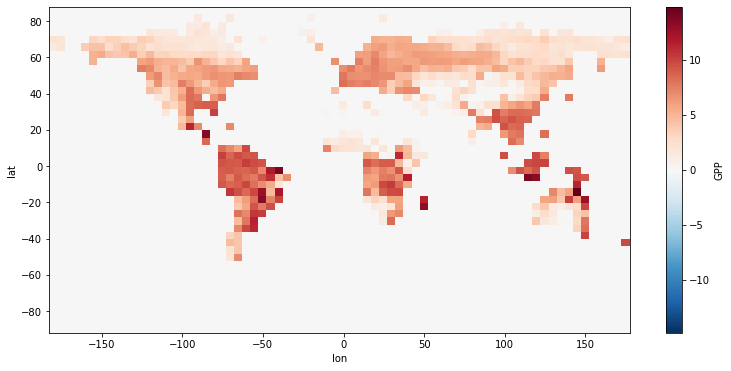

In [10]:
import xesmf as xe
conv=3600*24
if(clm5sp == 1):
    gpp=np.multiply(np.mean(dsdef.FPSN,0),1)
else:
    gpp=np.multiply(np.mean(dsdef.GPP,0),conv)
dsg=gpp
ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 90, 4.0)),
                     'lon': (['lon'], np.arange(-180, 180, 5)),})
regridder = xe.Regridder(dsg, ds_out, 'bilinear')
regridder.clean_weight_file()
regridder
gpp_out_model = regridder(dsg)
gpp_out_model = gpp_out_model.where(gpp_out_model<10000,0,0)
gpp_out_model.plot()

<h3> Regrid model evapfrac</h3>

In [11]:
totev=(dsdef.FCEV+dsdef.FCTR+dsdef.FGEV)
evfr_mod=np.divide(np.mean(dsdef.FCTR,0),np.mean(totev,0))

ds=evfr_mod
ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 90, 4.0)),
                     'lon': (['lon'], np.arange(-180, 180, 5)),})
regridder = xe.Regridder(ds, ds_out, 'bilinear')
regridder.clean_weight_file()
regridder
evfr_out_model = regridder(ds)

Create weight file: bilinear_46x72_45x72.nc
Remove file bilinear_46x72_45x72.nc


<h3> Regrid model ET</h3>

In [12]:
ET=np.multiply(np.mean((dsdef.QFLX_EVAP_TOT),0),conv)
ds=ET
ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 90, 4.0)),
                     'lon': (['lon'], np.arange(-180, 180, 5)),})
regridder = xe.Regridder(ds, ds_out, 'bilinear')
regridder.clean_weight_file()
regridder
et_out_model = regridder(ds)

Create weight file: bilinear_46x72_45x72.nc
Remove file bilinear_46x72_45x72.nc


<h3> Model Evaporation Budget</h3>

figs/defualt_fluxbudget_nocomp_fates_01_n.png


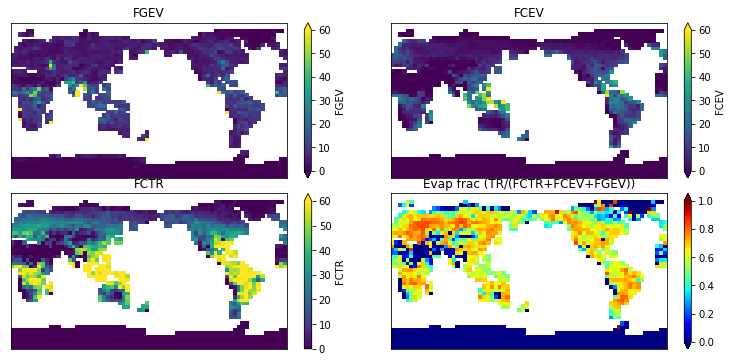

In [13]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [18,10]
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax = fig.add_subplot(2, 2, 1)
ds=np.multiply(np.mean(dsdef.FGEV,0),1)
plt1=ds.plot(vmin=0, vmax=60) 
ax.set_title('FGEV') 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
 
ax = fig.add_subplot(2, 2, 2)
ds=np.multiply(np.mean(dsdef.FCEV,0),1)
plt1=ds.plot(vmin=0, vmax=60) 
ax.set_title('FCEV') 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = fig.add_subplot(2, 2, 3)
ds=np.multiply(np.mean(dsdef.FCTR,0),1)
plt1=ds.plot(vmin=0, vmax=60) 
ax.set_title('FCTR') 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

totev=(dsdef.FCEV+dsdef.FCTR+dsdef.FGEV)
ax = fig.add_subplot(2, 2, 4)
evfr_mod=np.divide(np.mean(dsdef.FCTR,0),np.mean(totev,0))
plt1=evfr_mod.plot(vmin=0, vmax=1,cmap='jet') 
ax.set_title('Evap frac (TR/(FCTR+FCEV+FGEV))') 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

fnmfig='figs/defualt_fluxbudget_'+caseroot+'.png'
print(fnmfig)
plt.savefig(fnmfig)


<h3>EVAP FRAC MOD OBS FIG</h3>

figs/defualt_evapfrac_modobs_nocomp_fates_01_n.png


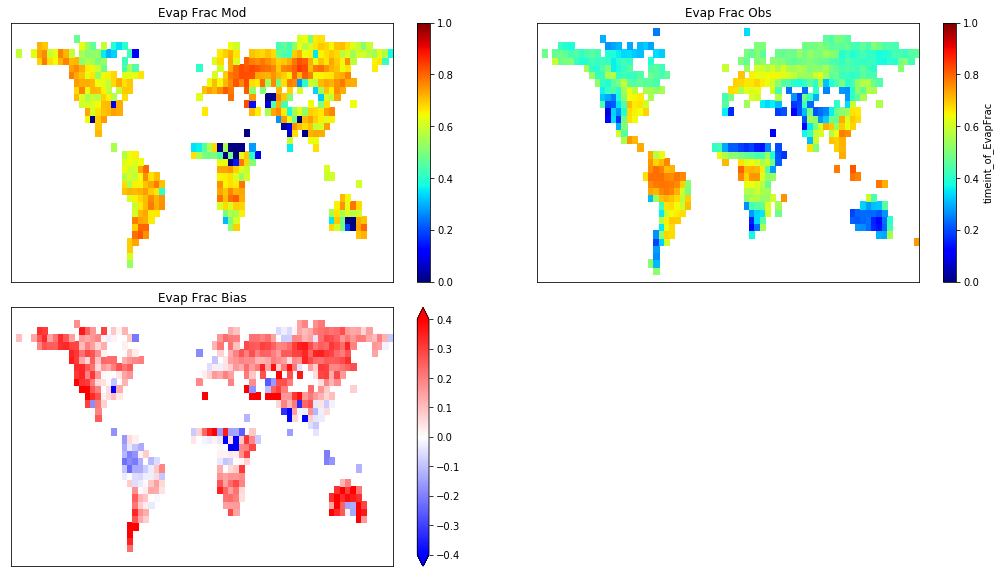

In [14]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [18,10]
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax = fig.add_subplot(2, 2, 1)
evfr_out_model = evfr_out_model.where(ds_out_EF_obs>0.0001,np.nan,0)

plt1=evfr_out_model.plot(vmin=0, vmax=1,cmap='jet')
ax.set_title('Evap Frac Mod') 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_ylim(ymin=-60,ymax=83)

ax = fig.add_subplot(2, 2, 2)
plt1=ds_out_EF_obs.plot(vmin=0, vmax=1,cmap='jet')
ax.set_title('Evap Frac Obs') 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_ylim(ymin=-60,ymax=83)

diffef=evfr_out_model-ds_out_EF_obs
ax = fig.add_subplot(2, 2, 3)
plt1=diffef.plot(vmin=0-0.4, vmax=0.4,cmap='bwr') 
ax.set_title('Evap Frac Bias') 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_ylim(ymin=-60,ymax=83)

fnmfig='figs/defualt_evapfrac_modobs_'+caseroot+'.png'
print(fnmfig)
plt.savefig(fnmfig)

<h3>GPP FRAC MOD OBS FIG</h3>

figs/defualt_gpp_modobs_nocomp_fates_01_n.png


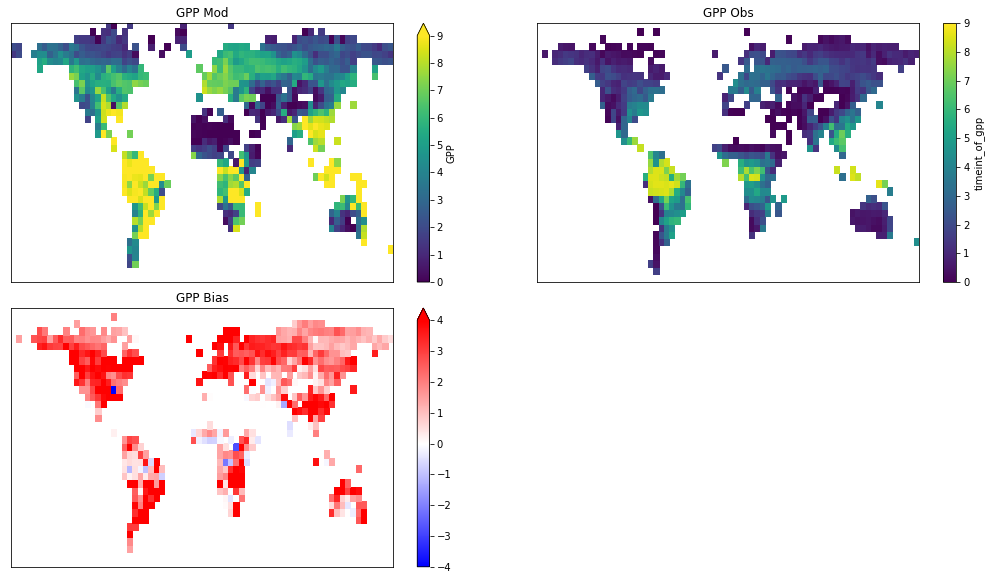

In [15]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [18,10]
fig.subplots_adjust(hspace=0.1, wspace=0.1)

gpp_out_model = gpp_out_model.where(gpp_out_model>0.0001,np.nan,0)
ds_out_GPP_obs = ds_out_GPP_obs.where(ds_out_GPP_obs>0.0001,np.nan,0)

ax = fig.add_subplot(2, 2, 1)
plt1=gpp_out_model.plot(vmin=0, vmax=9,cmap='viridis')
ax.set_title('GPP Mod') 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_ylim(ymin=-60,ymax=83)

ax = fig.add_subplot(2, 2, 2)
plt1=ds_out_GPP_obs.plot(vmin=0, vmax=9,cmap='viridis')
ax.set_title('GPP Obs') 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_ylim(ymin=-60,ymax=83)

diffgpp=gpp_out_model-ds_out_GPP_obs
ax = fig.add_subplot(2, 2, 3)
plt1=diffgpp.plot(vmin=0-4, vmax=4,cmap='bwr') 
ax.set_title('GPP Bias') 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_ylim(ymin=-60,ymax=83)

fnmfig='figs/defualt_gpp_modobs_'+caseroot+'.png'
print(fnmfig)
plt.savefig(fnmfig)

<h3>ET MOD OBS FIG</h3>

figs/defualt_et_modobs_nocomp_fates_01_n.png


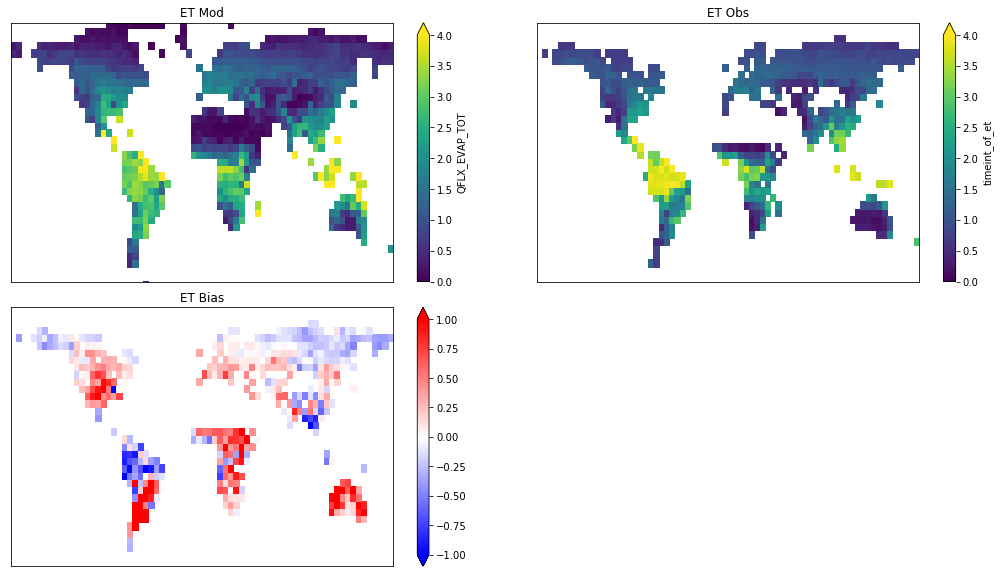

In [16]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [18,10]
fig.subplots_adjust(hspace=0.1, wspace=0.1)

et_out_model = et_out_model.where(et_out_model>0.0001,np.nan,0)
ds_out_ET_obs = ds_out_ET_obs.where(ds_out_ET_obs>0.0001,np.nan,0)

ax = fig.add_subplot(2, 2, 1)
plt1=et_out_model.plot(vmin=0, vmax=4,cmap='viridis')
ax.set_title('ET Mod') 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_ylim(ymin=-60,ymax=83)

ax = fig.add_subplot(2, 2, 2)
plt1=ds_out_ET_obs.plot(vmin=0, vmax=4,cmap='viridis')
ax.set_title('ET Obs') 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_ylim(ymin=-60,ymax=83)

diffgpp=et_out_model-ds_out_ET_obs
ax = fig.add_subplot(2, 2, 3)
plt1=diffgpp.plot(vmin=0-1, vmax=1,cmap='bwr') 
ax.set_title('ET Bias') 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_ylim(ymin=-60,ymax=83)

fnmfig='figs/defualt_et_modobs_'+caseroot+'.png'
print(fnmfig)
plt.savefig(fnmfig)